### Intro : As part of Shai for ai machine learning engineering internship, [Shai for ai](https://www.linkedin.com/company/shaiforai/) kaggle competition aimed at predicting diamond prices based on various features, enhancing abilities to manage full-scale machine learning projects.  

### [Overview](https://www.kaggle.com/competitions/diamond-price-prediciton-2024/overview)


<div style="border: 1px solid blue; padding: 10px; background-color: #e6f7ff;">
    <strong>Description:</strong> 
    Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

Evaluation
Evaluation Metric The evaluation metric for this competition is Root Mean Squared Error (RMSE). The RMSE is a commonly used measure of the differences between predicted values provided by a model and the actual observed values. Submission Format For every diamond (i.e. row) in the test dataset (test.csv), submission files should contain two columns: id and price. id should be an integer and price should be a real value. For each row, these two values should be separated by a comma. The file should contain a header and have the following format ``` Id,price 597,2838 ```


</div>




#### The first phase is about peaking at the data to gather basic information about it.
> importing necessary libraries (can be done anywhere as well)

> Reading the train and test set

> Inspecting the set's length, datatypes,numerical features' summary statistics (So basic information about the dataset)

> Checking the distribution for skewness and boxplots for outliers

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prices = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [4]:
print(f"{len(prices)} prices")

43152 prices


In [5]:
prices.head() 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
prices.info() # all datatypes seem to be matching

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
prices.describe() # There are x,y, and z valeus of zeros does that make sense?, should they be imputated?

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
prices.isna().any() # no null value

Id         False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

no null values but there are dimensions (x,y, and z) with values of zero which is physically impossible

a basic imputator could be used or manually filling them in with the median value

In [9]:
prices.duplicated().sum()

0

In [10]:
prices = prices.drop_duplicates() 
prices.duplicated().sum()

0

In [11]:
prices.carat.value_counts()

carat
0.30    2084
1.01    1806
0.31    1767
0.70    1589
0.32    1506
        ... 
3.65       1
4.00       1
2.67       1
3.04       1
3.40       1
Name: count, Length: 266, dtype: int64

In [12]:
prices[(prices['x'] == 0) | (prices['y'] == 0) | (prices['z'] == 0)]


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
571,572,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,904,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1222,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,4981,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,6766,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,11222,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,13728,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,14266,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,16972,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,21062,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


In [13]:
zeros_count = {
    'x_zeros': (prices['x'] == 0).sum(),
    'y_zeros': (prices['y'] == 0).sum(),
    'z_zeros': (prices['z'] == 0).sum()
}
zeros_count

{'x_zeros': 5, 'y_zeros': 4, 'z_zeros': 17}

In [14]:
# Imputation ??
# Dropping the rows that have zero dimensions all around and then imputing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")

prices = prices[~((prices.x == 0)&(prices.y == 0)&(prices.z == 0))] # Selecting all rows that do have at least one dimension enterned
# The imputer deals with "nan" so zeros --> nan
prices['x'].replace(0, np.nan, inplace=True)
prices['y'].replace(0, np.nan, inplace=True)
prices['z'].replace(0, np.nan, inplace=True)

prices[['x', 'y', 'z']] = imputer.fit_transform(prices[['x', 'y', 'z']])

# To stay consistent the same imputer object that was fit to the dimensions of the train set (prices) will be used on the test set
test_set[['x', 'y', 'z']] = imputer.transform(test_set[['x', 'y', 'z']])

In [15]:
print(f"New length of observations: {len(prices)} prices")
print(f"{len(prices[(prices['x'] == 0) | (prices['y'] == 0) | (prices['z'] == 0)])} diamonds with no dimensions at all")

New length of observations: 43148 prices
0 diamonds with no dimensions at all


In [16]:
prices = prices.drop('Id',axis=1) # No need for the Id here
prices_num = prices.select_dtypes(include=['int64', 'float64']).columns

<Figure size 1000x1000 with 0 Axes>

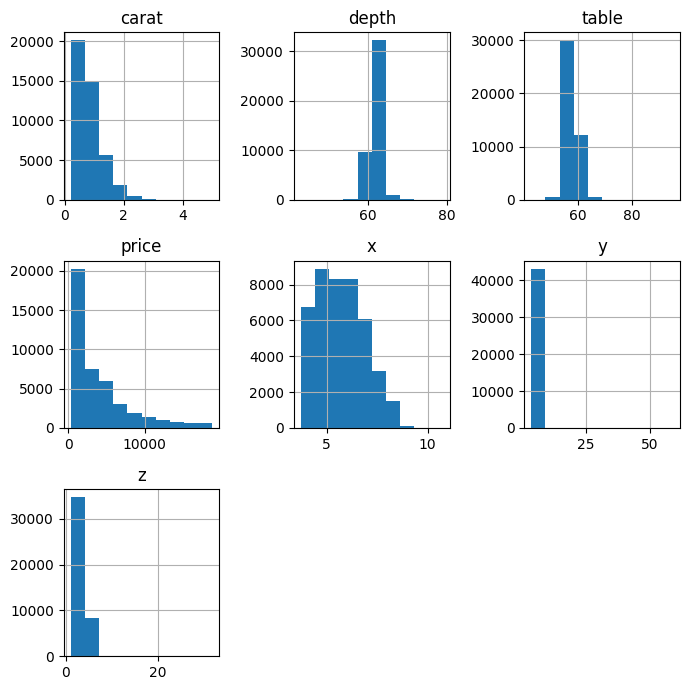

<Figure size 640x480 with 0 Axes>

In [17]:
# checking the distributions
plt.figure(figsize=(10, 10))
prices[prices_num].hist(figsize=(7,7))
plt.tight_layout()
plt.show()
plt.clf()

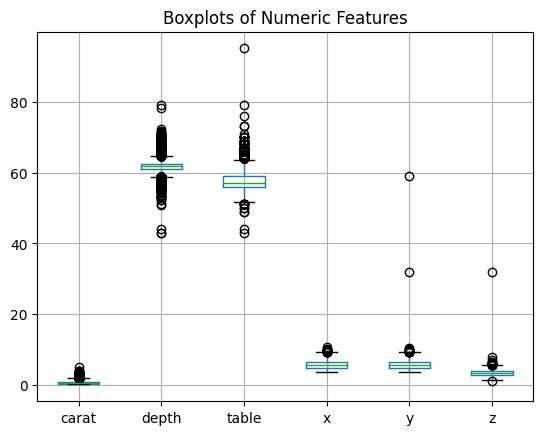

<Figure size 640x480 with 0 Axes>

In [18]:
#Checking outliers
exclude_columns = ['price']
include_columns = [col for col in prices_num if col not in exclude_columns ]
prices[include_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

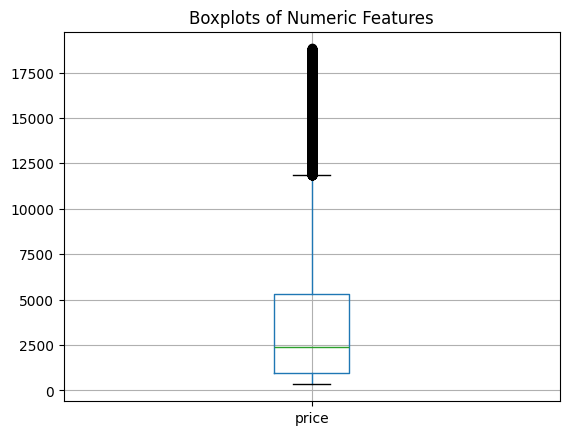

<Figure size 640x480 with 0 Axes>

In [19]:
prices[exclude_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

In [20]:
# Function to calculate quantiles and IQR, then cap (to handle outliers) values
def cap_values(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.25 * IQR # 2.25 instead of the base convention of 1.5 
    upper_bound = Q3 + 2.25 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) # Applying the capping here
    return lower_bound, upper_bound # to apply on the test set

# Store bounds for each feature, applying the cap and then storing them in the bounds dictionary
bounds = {}

features_to_cap = ['depth', 'table', 'x', 'y', 'z']
for feature in features_to_cap:
    bounds[feature] = cap_values(prices, feature)

# Apply log transformation for 'carat' and 'price' to reduce skewness
prices['carat'] = np.log1p(prices['carat'])
prices['price'] = np.log1p(prices['price'])

# Applying the same log transformations to the test set
test_set['carat'] = np.log1p(test_set['carat'])

# Cap values in the test set **using the bounds from the training set**
for feature in features_to_cap:
    lower_bound, upper_bound = bounds[feature]
    test_set[feature] = np.clip(test_set[feature], lower_bound, upper_bound)


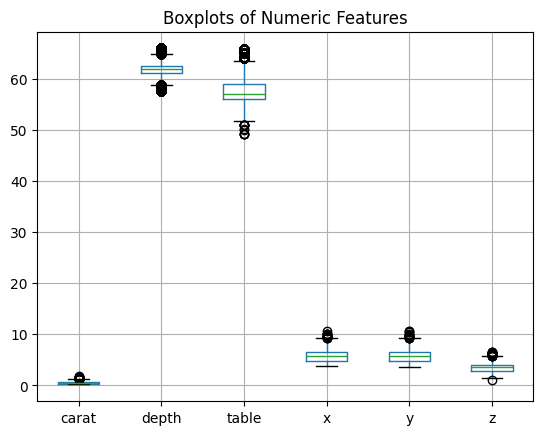

<Figure size 640x480 with 0 Axes>

In [21]:
exclude_columns = ['price']
include_columns = [col for col in prices_num if col not in exclude_columns ]
prices[include_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

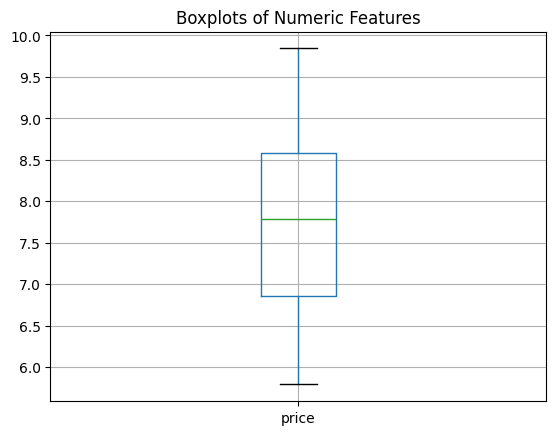

<Figure size 640x480 with 0 Axes>

In [22]:
prices[exclude_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

<div style="border: 1px solid #2196F3; padding: 10px; background-color: #BBDEFB; border-radius: 5px;">
    <strong>Key takeaways:

    >1. The dataset contained no null values, 97 duplictes that were dropped, and some diamonds even had zero dimensionality treates that have been replaced with the corresponding median value for each feature via the SingleImputer

    >2.Distributions showcased skewness in many features such as Price, Caret, and X that were capped using cap_values() function.

    >3.Boxplots conveyed that all values contained **Assumed** outliers that were treated using the capping function and log transformation to the price and caret features
        
</div>


### Exploratory Data Analysis -EDA

Throughout the Data Exploration various topics will tackled

> Inspecting Pearson Correlation/Scatterplits factor for linear/Non-linear relationships, in addition to heatmaps for better visual understanding.

> Exploring Attribute Combinations and correlation changes.

> Understanding how the price changes among different groups within the categorical variables.

In [23]:
p_copy = prices.copy()
correlation = p_copy[prices_num].corr()
correlation["price"].sort_values(ascending=False)

price    1.000000
y        0.961247
x        0.960721
z        0.956040
carat    0.953651
table    0.161506
depth   -0.004048
Name: price, dtype: float64

# explain

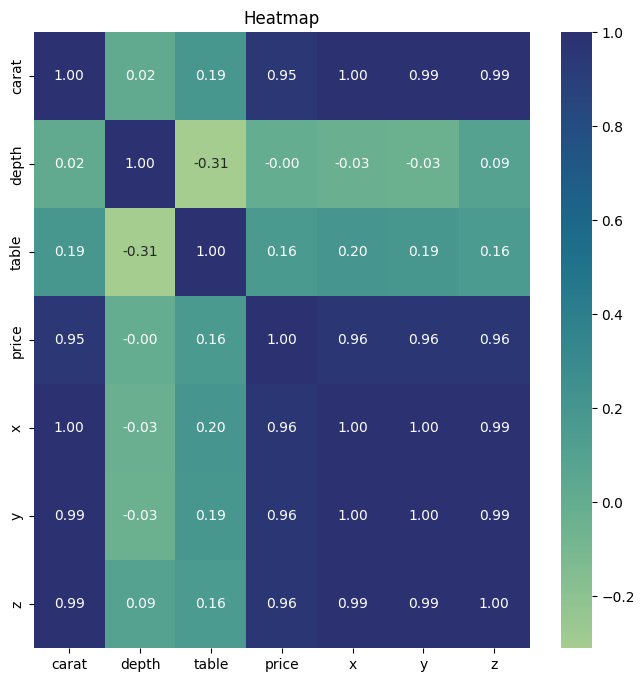

In [24]:
# how do numeric variables correlate to each  other
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap')
plt.show()

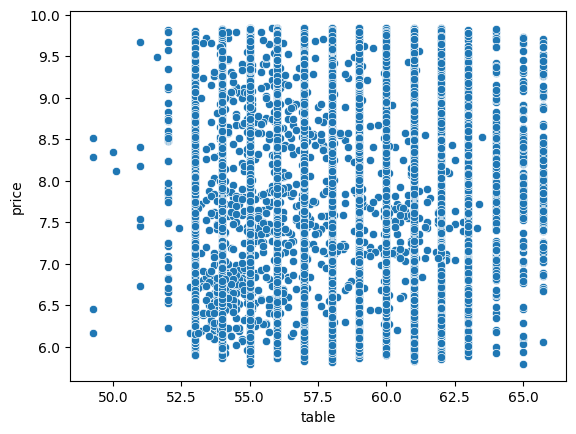

<Figure size 640x480 with 0 Axes>

In [25]:
# Since the correlation tests the linear relationship between variables it is wise to inspect low correlated variables
# They might be non-linearly related
sns.scatterplot(x='table',y='price',data = p_copy)
plt.show()
plt.clf()

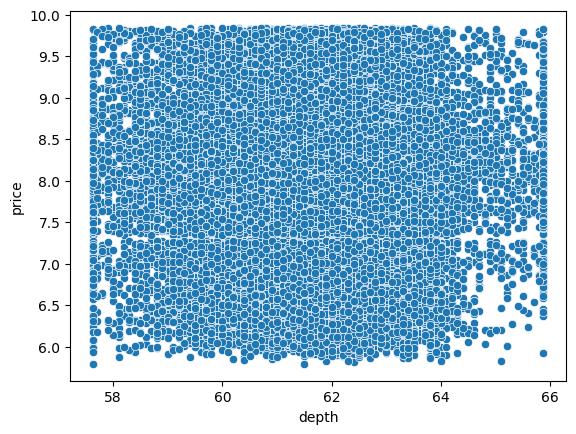

<Figure size 640x480 with 0 Axes>

In [26]:
sns.scatterplot(x='depth',y='price',data = p_copy)
plt.show()
plt.clf()

In [27]:
# # trying a new attribute called size x*y*z, length to width ratio, depth to width ratio
p_copy["size"] = p_copy["x"] * p_copy["y"] * p_copy["z"] 
p_copy["x/y"] =  p_copy["x"] * p_copy["y"] 
p_copy["z/y"] =   p_copy["z"] / p_copy["y"] 

correlation_n = p_copy[p_copy.select_dtypes(include=['int64', 'float64']).columns].corr()
correlation_n["price"].sort_values(ascending=False)


price    1.000000
y        0.961247
x        0.960721
z        0.956040
carat    0.953651
x/y      0.946270
size     0.921564
table    0.161506
z/y      0.020144
depth   -0.004048
Name: price, dtype: float64

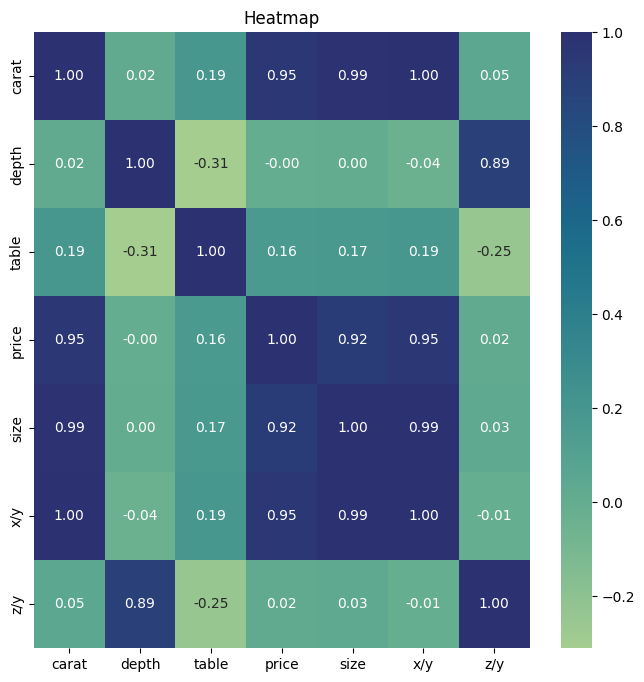

In [28]:
corr = p_copy[['carat', 'depth', 'table', 'price', 'size', 'x/y','z/y']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap')
plt.show()

### From both heatmaps we could see the high correlation between (carat,x,y,and z and the price in heatmap1)/ (carat,size, x/y variables and the price in heatmap2)
### Having many higly correlated values could affect model like Linear regression, while not affecting tree based model that much.

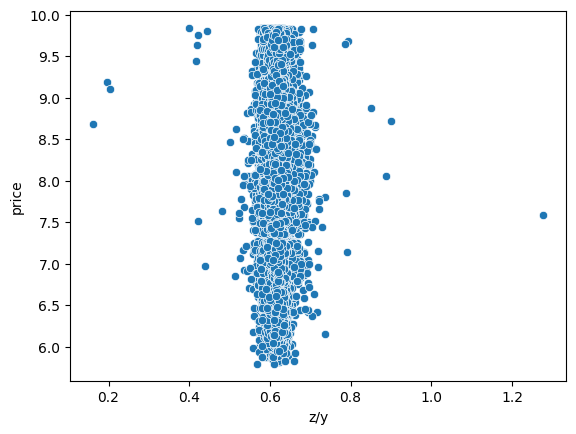

<Figure size 640x480 with 0 Axes>

In [29]:
#checking the scatter plot of the extar z/y
sns.scatterplot(x='z/y',y='price',data = p_copy) # How does the relationship look like
plt.show()
plt.clf()

--------------------
#### For building an intuition for categorical variables seeing how price progresses across individual groups could help. 
>Extra :(ANOVA test helps with understanding significantly associated groups within variables)

In [30]:
categorical_variables = ['cut', 'color', 'clarity']

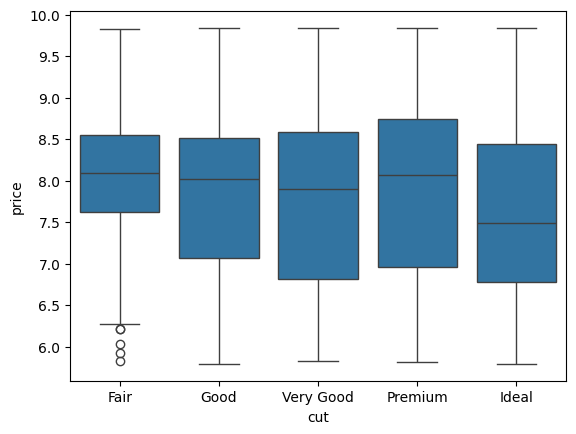

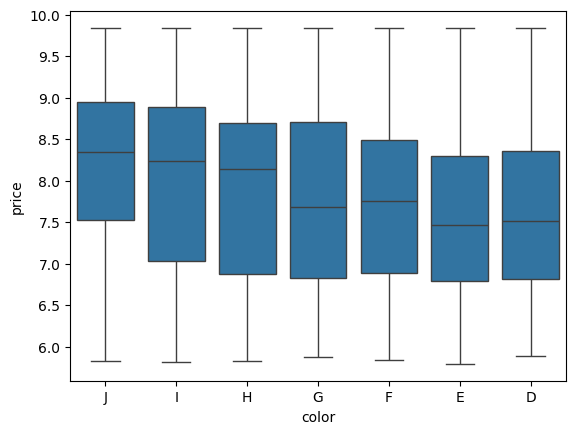

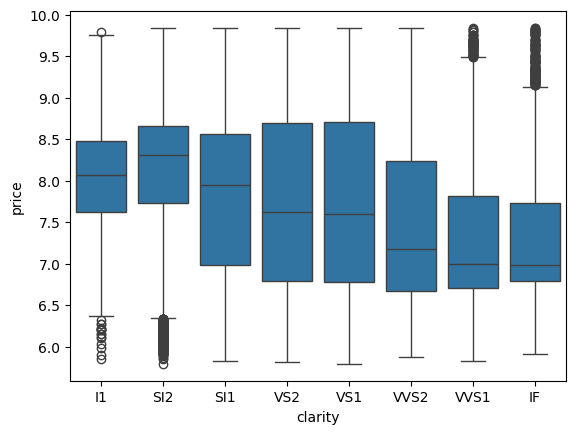

<Figure size 640x480 with 0 Axes>

In [31]:
# Converting to an ordered categorical pandas datatype to appear in order on the plot
p_copy['cut'] = pd.Categorical(p_copy['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
p_copy['color'] = pd.Categorical(p_copy['color'], categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'], ordered=True)
p_copy['clarity'] = pd.Categorical(p_copy['clarity'], categories=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], ordered=True)


for var in categorical_variables:
    sns.boxplot(y='price',x=var,data=p_copy,orient='v')
    plt.show()
    plt.clf()

<div style="border: 1px solid #2196F3; padding: 10px; background-color: #BBDEFB; border-radius: 5px;">
    <strong>Key takeaways:

    >1. The dimensions plus the caret features had the most correlation with the price variable, yet showcasing high correlation among them leading to the attempt to calculate the size, and ratios (x/y and z/y) to explore more combinations to reduce features while maintaing most of the information. 

    >2
    
      Cut:
            Fair cut diamonds have the lowest prices and less variability.
            
            Other cuts (Good, Very Good, Premium, Ideal) have higher prices with more variability, but the differences in median prices are not drastically large.

      Color:
            While there is a general trend that better color grades (closer to D) tend to have higher prices, the relationship is not strictly linear.
            
            There is considerable overlap in the prices across different color grades.
      Clarity:
            
            There is a clearer trend that better clarity grades (towards IF) have higher median prices.
            
            The increase in price is more pronounced in the higher clarity grades, with noticeable variability and presence of high-value outliers.
        
</div>


In [32]:
# Size will be added to the prices dataset and then filtered to different subsets
prices["size"] = prices["x"] * prices["y"] * prices["z"]
prices['x/y'] = prices['x'] / prices['y']
prices['z/y'] = prices['z'] / prices['y']
prices.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'size', 'x/y', 'z/y'],
      dtype='object')

In [33]:
# This part encodes categorical variables into numebrs for models that deal better with them (e.g. Linear Regression)
from sklearn.preprocessing import OrdinalEncoder 
enc = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                                 ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
prices[['cut', 'color', 'clarity']] = enc.fit_transform(prices[['cut', 'color', 'clarity']]) # starts the lowest at 0 
prices[['cut', 'color', 'clarity']] += 1 # Adjusted to start at 1 


# Apply the same changes to the test_set 
test_set[['cut', 'color', 'clarity']] = enc.transform(test_set[['cut', 'color', 'clarity']])
test_set[['cut', 'color', 'clarity']] += 1 # Adjust to start at 1

In [34]:
prices.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z,size,x/y,z/y
0,0.722706,5.0,2.0,2.0,61.8,57.0,8.359603,6.57,6.60,4.07,176.483340,0.995455,0.616667
1,0.920283,4.0,4.0,6.0,60.9,58.0,9.626745,7.38,7.42,4.51,246.965796,0.994609,0.607817
2,0.277632,5.0,5.0,4.0,61.3,56.0,6.720220,4.43,4.41,2.71,52.943373,1.004535,0.614512
3,0.425268,5.0,4.0,4.0,61.2,56.0,7.363914,5.19,5.22,3.19,86.422842,0.994253,0.611111
4,0.530628,4.0,3.0,6.0,61.0,57.0,7.862112,5.76,5.72,3.50,115.315200,1.006993,0.611888


## Model Selection -> Evaluation -> Model Prediction and Inferencing 

#### This part is straightforward, models (Linear Regression, Decision Trees, and Random Forests) will be tested via cross-validation (rmse output), the best model will be choosen and then will be fine-tuned to make predictions

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define features sets
X_dim = prices.drop(['size', 'price'], axis=1)
X_size = prices.drop(['x', 'y', 'z', 'price'], axis=1)
y = prices['price']

# Scaling
scaler1 = StandardScaler()
X_dimscaled = scaler1.fit_transform(X_dim)


# Splitting the data into training and testing sets for both feature sets
X_train_dim, X_test_dim, y_train, y_test = train_test_split(X_dimscaled, y, test_size=0.2, random_state=42)
X_train_size, X_test_size, _, _ = train_test_split(X_sizescaled, y, test_size=0.2, random_state=42) 
# Initialize models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Function to evaluate models
def check_models(models, X_train, y_train, cross_val_folds=10):
    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cross_val_folds)
        rmse = np.sqrt(-cv_scores)
        results[name] = rmse.mean()
        print(f"{name} RMSE: {rmse.mean()} ± {rmse.std()}")

# Evaluate models on the first feature set
print("Evaluating models on dimensions feature set:")
check_models(regression_models, X_train_dim, y_train)

Evaluating models on dimensions feature set:
Linear Regression RMSE: 0.17151867276019458 ± 0.024101718686433186
Decision Tree RMSE: 0.12271155740940524 ± 0.0028095893326853037
Random Forest RMSE: 0.08884269390780243 ± 0.003622853975572019


In [36]:
# subsets of features 
feature_sets = {
    'Original Features': ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'depth', 'table'],
    'Reduced Feature Set': ['carat', 'cut', 'color', 'clarity', 'size'],  
    'Ratios Only': ['carat', 'x/y', 'z/y'],  
    'Cat + High corr values_xyz' :  ['carat', 'cut', 'color', 'clarity', 'x','y','z'],
    'Cat + High corr values_noxyz' : ['carat', 'cut', 'color', 'clarity', 'x/y'],
    'Noxyz':['carat', 'cut', 'color', 'clarity', 'x/y', 'z/y','depth', 'table']
}

results = {}
for name, features in feature_sets.items():
    X_subset = prices[features]
    y = prices['price']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_subset)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = np.mean(rmse_scores)

    print(f"{name} - Average RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")


Original Features - Average RMSE: 0.09 ± 0.00
Reduced Feature Set - Average RMSE: 0.12 ± 0.00
Ratios Only - Average RMSE: 0.25 ± 0.00
Cat + High corr values_xyz - Average RMSE: 0.09 ± 0.00
Cat + High corr values_noxyz - Average RMSE: 0.09 ± 0.00
Noxyz - Average RMSE: 0.09 ± 0.00


In [37]:
from sklearn.model_selection import RandomizedSearchCV

X = prices[['carat', 'cut', 'color', 'clarity', 'x/y', 'z/y','depth', 'table']]
y = prices['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

param_distributions = {
   'n_estimators': np.random.randint(1, 200, 10),
    'max_features': np.random.randint(1, 8, 10),
} 
 # more options:
 #    'n_estimators': randint(100, 500),  # Number of trees in the forest
 #    'max_depth': randint(10, 50),        # Maximum number of levels in each decision tree
 #    'min_samples_split': randint(2, 20),  # Minimum number of data points placed in a node before the node is split
 #    'min_samples_leaf': randint(1, 20),   # Minimum number of data points allowed in a leaf node
 #    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at every split

# Define the model
model = RandomForestRegressor(random_state=42)

# Execute the Randomized Search
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=10, cv=10, scoring='neg_mean_squared_error',random_state=42)
random_search.fit(X_scaled, y)  

# Results
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)
print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score}")


Best parameters: {'n_estimators': 184, 'max_features': 5}
Best RMSE: 0.0853695886280469


In [38]:
print(best_model)

RandomForestRegressor(max_features=5, n_estimators=184, random_state=42)


<div style="border: 1px solid #2196F3; padding: 10px; background-color: #BBDEFB; border-radius: 5px;">
    <strong>Key takeaways:

    >1. RandomForests Regressor model has been selected as it had the best cross validation rmse score and has been fine tuned using RandomizedSearchCV  to make the predictions.
        
</div>


In [39]:
# use the best model on the testing set
# add all relevant columns especially the ones needed by the best model 
test_set["size"] = test_set["x"] * test_set["y"] * test_set["z"]
test_set['x/y'] = test_set['x'] / test_set['y']
test_set['z/y'] = test_set['z'] / test_set['y']

X_test = test_set[['carat', 'cut', 'color', 'clarity', 'x/y', 'z/y','depth', 'table']]

X_test_scaled = scaler.transform(X_test) #same scalar object
# Predict using the best model on the scaled test set features
final_predictions = best_model.predict(X_test_scaled)

# Transform predictions back to the original scale
original_scale_predictions = np.expm1(final_predictions)


In [40]:
full_test = test_set.copy()
full_test['price'] = original_scale_predictions
full_test.rename(columns={'Id':'ID'}, inplace=True)
full_test.head()

,ID,carat,cut,color,clarity,depth,table,x,y,z,size,x/y,z/y,price
0,1,0.292670,5.0,4.0,6.0,61.1,57.0,4.52,4.48,2.75,55.686400,1.008929,0.613839,1003.371812
1,2,0.536493,4.0,6.0,4.0,62.7,58.0,5.74,5.68,3.58,116.719456,1.010563,0.630282,2878.962515
2,3,0.364643,3.0,2.0,5.0,62.8,56.0,4.83,4.88,3.05,71.889720,0.989754,0.625000,797.197188
3,4,0.593327,4.0,6.0,2.0,60.1,59.0,6.09,6.03,3.65,134.037855,1.009950,0.605307,2811.711395
4,5,0.336472,5.0,4.0,7.0,61.2,56.0,4.74,4.80,2.92,66.435840,0.987500,0.608333,1107.113711


In [41]:
full_test[['ID','price']].to_csv('submission2.csv', index=False)